<a href="https://colab.research.google.com/github/sebasbrowar/FisicaComputacional1/blob/main/Actividad5/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\text{Actividad 5}$

## $\text{DataFrame y Bibliotecas}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# Para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Preparamos el DataFrame df_meteo
# En esta nueva Jupyter Notebook, en una celda vamos a concentrar todas las operaciones
# de transformación del dataframe original df_dist

# Tomar la dirección URL del archivo en formato 'raw'
# url = 'https://raw.githubusercontent.com/carloslizarragac/FisicaComputacional1/master/Actividad1/Guaymas26292.txt'
url = 'https://raw.githubusercontent.com/sebasbrowar/FisicaComputacional1/main/Actividad5/2038.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.strftime('%b')

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28868 entries, 0 to 28867
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   28868 non-null  datetime64[ns]
 1   Precip  28843 non-null  float64       
 2   Evap    28117 non-null  float64       
 3   Tmax    28727 non-null  float64       
 4   Tmin    28756 non-null  float64       
 5   Año     28868 non-null  int64         
 6   Mes     28868 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.5+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1929-01-01     0.0  11.0   NaN   NaN  1929  Jan
1 1929-01-02     0.0   5.0  23.5   8.0  1929  Jan
2 1929-01-03     0.0   1.0  19.0   4.0  1929  Jan
3 1929-01-04     0.0   3.0  18.5   6.5  1929  Jan
4 1929-01-05     0.0   4.0  20.0   2.0  1929  Jan
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
28863 2012-12-27     0.0   0.4  17.0   9.0  2012  Dec
28864 2

In [3]:
# Hacemos una copia del último DataFrame para realizar nuevas operaciones
df_meteo_ts = df_meteo.copy()
# Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_meteo_ts = df_meteo_ts.set_index('Fecha')

# Verificamos
df_meteo_ts.info()
print(df_meteo_ts.head())
print(df_meteo_ts.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28868 entries, 1929-01-01 to 2012-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  28843 non-null  float64
 1   Evap    28117 non-null  float64
 2   Tmax    28727 non-null  float64
 3   Tmin    28756 non-null  float64
 4   Año     28868 non-null  int64  
 5   Mes     28868 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ MB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1929-01-01     0.0  11.0   NaN   NaN  1929  Jan
1929-01-02     0.0   5.0  23.5   8.0  1929  Jan
1929-01-03     0.0   1.0  19.0   4.0  1929  Jan
1929-01-04     0.0   3.0  18.5   6.5  1929  Jan
1929-01-05     0.0   4.0  20.0   2.0  1929  Jan
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
2012-12-27     0.0   0.4  17.0   9.0  2012  Dec
2012-12-28     0.0   2.7  21.0   5.0 

## $\text{Ejercicio 1}$

$\text{Explora tus datos de Precipitación los últimos años 1990- fin de datos.}$

In [5]:
# Seleccionaremos un conjunto de años de 30 años  
df_30 = df_meteo_ts[(df_meteo_ts['Año'] >= 1930) & (df_meteo_ts['Año'] < 1960)]
df_60 = df_meteo_ts[(df_meteo_ts['Año'] >= 1960) & (df_meteo_ts['Año'] < 1990)]
df_90 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2013)]

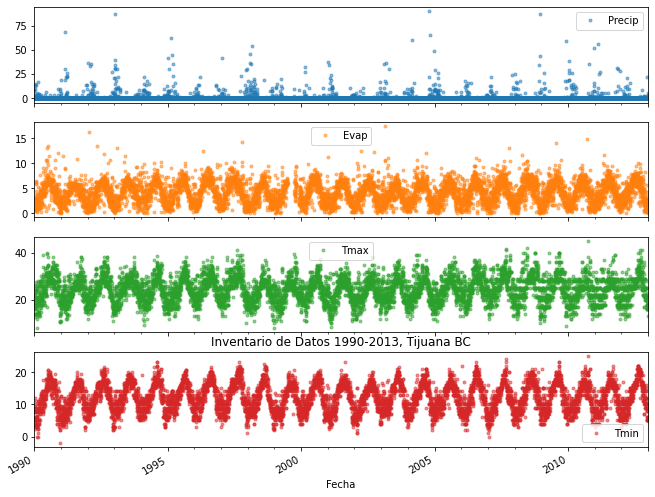

In [7]:
# Podemos visualizar la colección de los últimos 30 años y ver si hay datos faltantes.
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1990-2013, Tijuana BC');

$\text{Grafica todo el rango de datos utilizando la función df.plot().}$

Variación en Precipitación promedio 60-30 : 0.21605142159572854
Variación en Precipitación promedio 90-30 : 0.2952596033708267
Variación en Precipitación promedio 90-60 : 0.07920818177509814


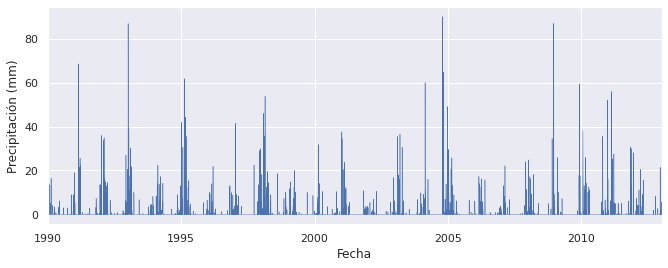

In [ ]:
# Graficamos la Precipitación de los últimos 30 años (1990-hasta 2013)
sns.set(rc={'figure.figsize':(11, 4)})
Precip_ave_90 = df_90.Precip.mean()
Precip_ave_60 = df_60.Precip.mean()
Precip_ave_30 = df_30.Precip.mean()
df_90['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');

print('Variación en Precipitación promedio 60-30 :', Precip_ave_60-Precip_ave_30)
print('Variación en Precipitación promedio 90-30 :', Precip_ave_90-Precip_ave_30)
print('Variación en Precipitación promedio 90-60 :', Precip_ave_90-Precip_ave_60)

$\text{Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos.}$

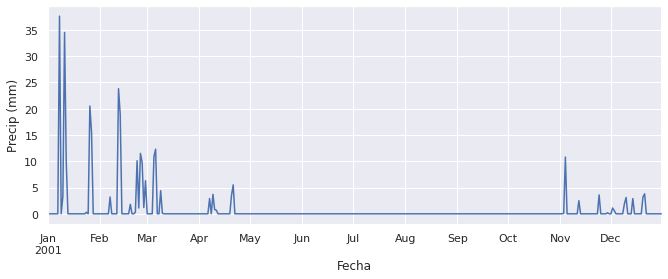

In [ ]:
# Investigando un año de datos, usando la función df.loc() para filtrar un periodo
ax = df_90.loc['2001', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

$\text{Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot().}$

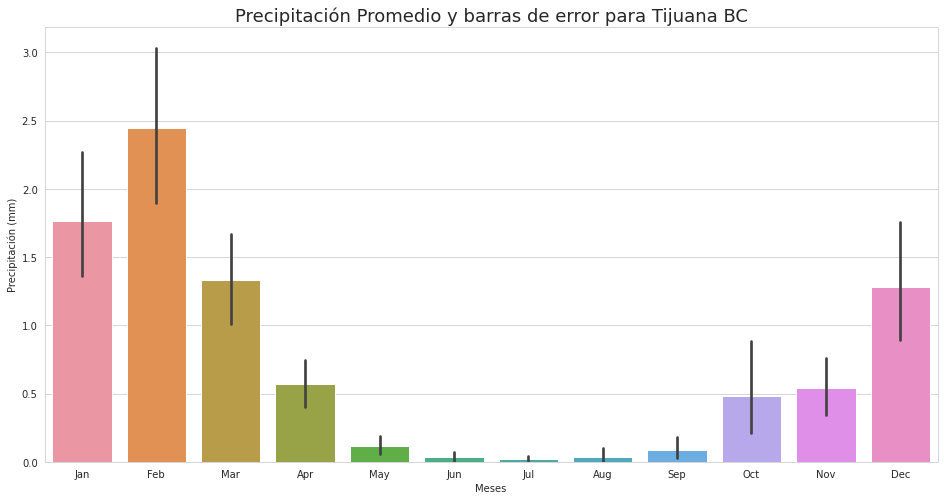

In [8]:
# Gráfica de Precipitación últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_90); # Gráfica de barras

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Tijuana BC', fontsize=18)

plt.show()

## $\text{Ejercicio 2}$

$\text{Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas.}$

In [ ]:
# Seleccionaremos un conjunto de años de 30 años  
df_30 = df_meteo_ts[(df_meteo_ts['Año'] >= 1930) & (df_meteo_ts['Año'] < 1960)]
df_60 = df_meteo_ts[(df_meteo_ts['Año'] >= 1960) & (df_meteo_ts['Año'] < 1990)]
df_90 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2013)]

$\text{Grafica todo el rango de datos utilizando la función df.plot(), incluye una línea punteada mostrando el promedio.}$

Variación ºC Tmax promedio 90s-60s : 0.7698911009398834


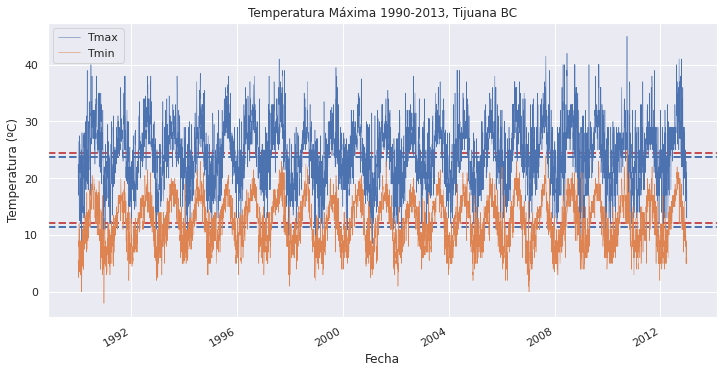

In [10]:
# Graficamos la Tmax de los últimos 30 años (1990-hasta 2013)

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedios
Tmax_ave_90 = df_90.Tmax.mean()
Tmax_ave_60 = df_60.Tmax.mean()
Tmin_ave_90 = df_90.Tmin.mean()
Tmin_ave_60 = df_60.Tmin.mean()

# Graficar líneas promedios (rojo 1990-2013, azul 1960-1989)
plt.axhline(Tmax_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmax_ave_60, color = 'b', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave_60, color = 'b', linestyle='--', linewidth=2);

# Graficar la Temperatura
df_90['Tmax'].plot(linewidth=0.5);
df_90['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temperatura (ºC)');
plt.title('Temperatura Máxima 1990-2013, Tijuana BC')

plt.legend();

# Imprime la diferencia de Temperaturas promedio entre épocas 
print('Variación ºC Tmax promedio 90s-60s :', Tmax_ave_90-Tmax_ave_60)

$\text{Analiza un año específico completo para las dos Temperaturas, con apoyo de la función df.loc().}$

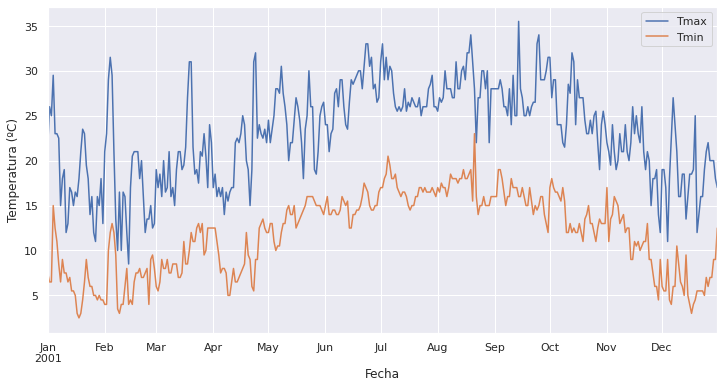

In [ ]:
# Investigando un año de datos, usando la función df.loc() para filtrar un periodo
ax = df_90.loc['2001', 'Tmax'].plot()
ax = df_90.loc['2001', 'Tmin'].plot()

ax.set_ylabel('Temperatura (ºC)');

plt.legend();

$\text{Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio. }$

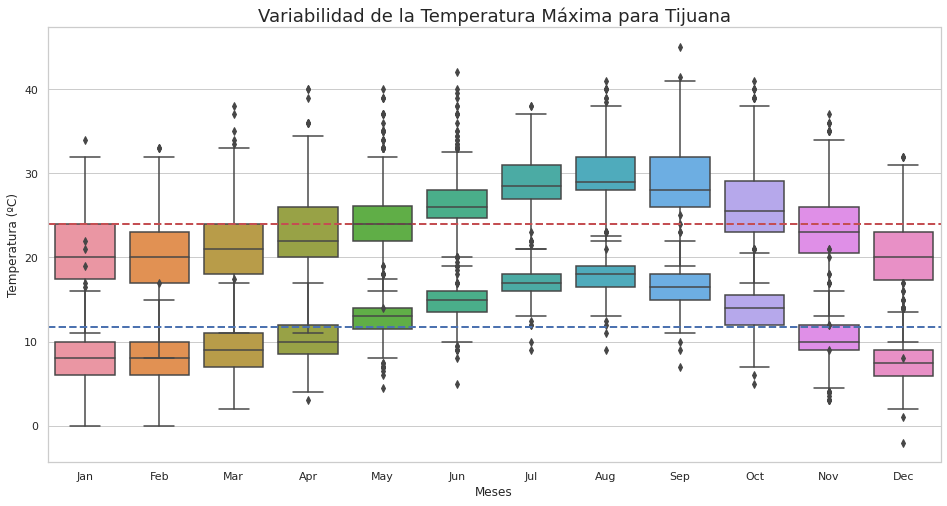

mean(Tmax) =  23.990597695547535
mean(Tmin) =  11.752166504381535
Diff Tmax_ave-Tmin_ave =  12.238431191166


In [16]:
# Gráfica de Temepraturas Máximas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=df_90);
g=sns.boxplot(x='Mes', y='Tmin', data=df_90);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Tijuana', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

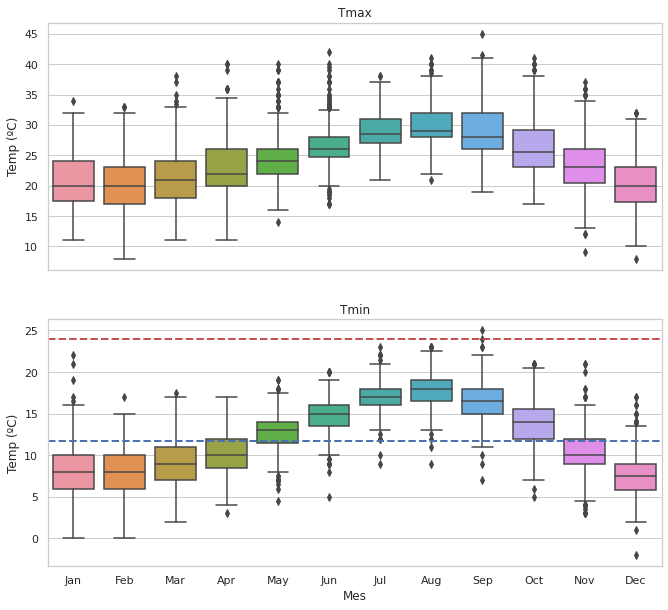

In [17]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.
# Dos gráficas en una
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin'], axes):
  sns.boxplot(data=df_90, x='Mes', y=name, ax=ax)
  if name == ['Tmax', 'Tmin']:
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Temp (ºC)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

#Tmax_ave = df_meteo.Tmax.mean()
#Tmin_ave = df_meteo.Tmin.mean()
#plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
#plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);



## $\text{Ejercicio 3}$

$\text{Realiza el mismo análisis que en el Ejercicio 2, pero para la variable de Evaporación.}$

In [ ]:
# Seleccionaremos un conjunto de años de 30 años  
df_30 = df_meteo_ts[(df_meteo_ts['Año'] >= 1930) & (df_meteo_ts['Año'] < 1960)]
df_60 = df_meteo_ts[(df_meteo_ts['Año'] >= 1960) & (df_meteo_ts['Año'] < 1990)]
df_90 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2013)]

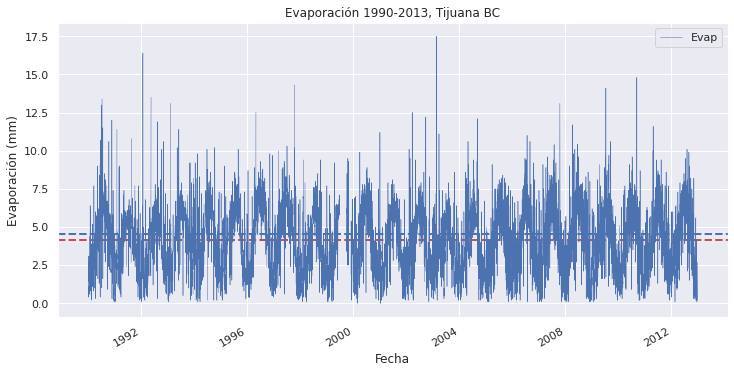

In [ ]:
# Graficamos la Tmax de los últimos 30 años (1990-hasta 2013)

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedios
Evap_ave_90 = df_90.Evap.mean()
Evap_ave_60 = df_60.Evap.mean()

# Graficar líneas promedios (rojo 1990-2013, azul 1960-1989)
plt.axhline(Evap_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Evap_ave_60, color = 'b', linestyle='--', linewidth=2);

# Graficar la Temperatura
df_90['Evap'].plot(linewidth=0.5);
plt.ylabel('Evaporación (mm)');
plt.title('Evaporación 1990-2013, Tijuana BC')

plt.legend();


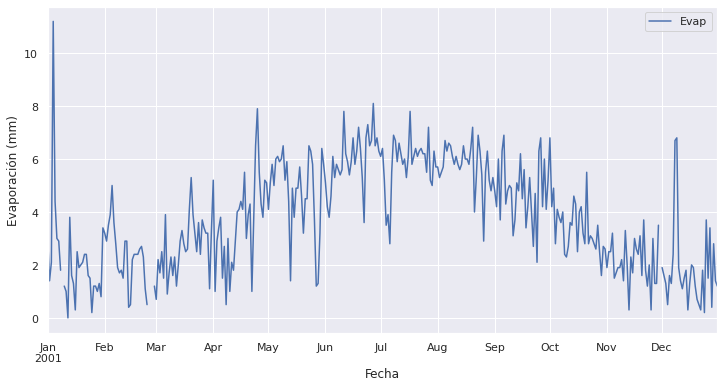

In [ ]:
# Investigando un año de datos, usando la función df.loc() para filtrar un periodo
ax = df_90.loc['2001', 'Evap'].plot()

ax.set_ylabel('Evaporación (mm)');

plt.legend();

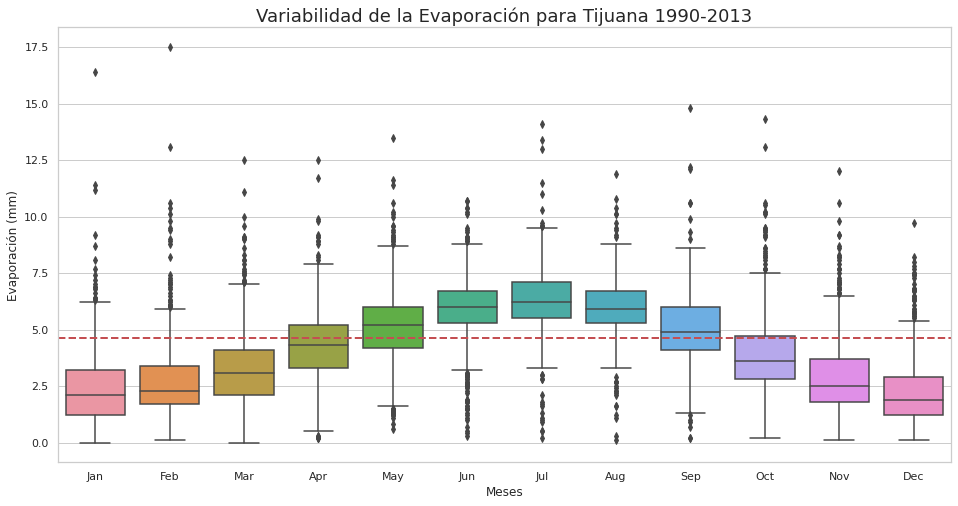

In [ ]:
# Gráfica de Temperaturas Mínimas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Evaporación
Evap_ave = df_meteo.Evap.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Evap', data=df_90);
# Linea de Tmin promedio 
plt.axhline(Evap_ave, color = 'r', linestyle='--', linewidth=2);

plt.xlabel('Meses')
plt.ylabel('Evaporación (mm)')
plt.title('Variabilidad de la Evaporación para Tijuana 1990-2013', fontsize=18)

plt.show()


## $\text{Ejercicio 4}$

$\text{ Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función df.rolling(). Explora tus datos:}$

In [ ]:
# Seleccionaremos un conjunto de años de 30 años  
df_30 = df_meteo_ts[(df_meteo_ts['Año'] >= 1930) & (df_meteo_ts['Año'] < 1960)]
df_60 = df_meteo_ts[(df_meteo_ts['Año'] >= 1960) & (df_meteo_ts['Año'] < 1990)]
df_90 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2013)]

In [ ]:
# Suavizando la curva de Tmax, utilizando Promedios Móviles (7,30 y 365 días)
data_cols = ['Evap', 'Tmax', 'Tmin']
df_90_7d = df_90[data_cols].rolling(7, center=True).mean()
df_90_30d = df_90[data_cols].rolling(30, center=True).mean()
df_90_365d = df_90[data_cols].rolling(365, center=True).mean()

$\text{Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días.}$

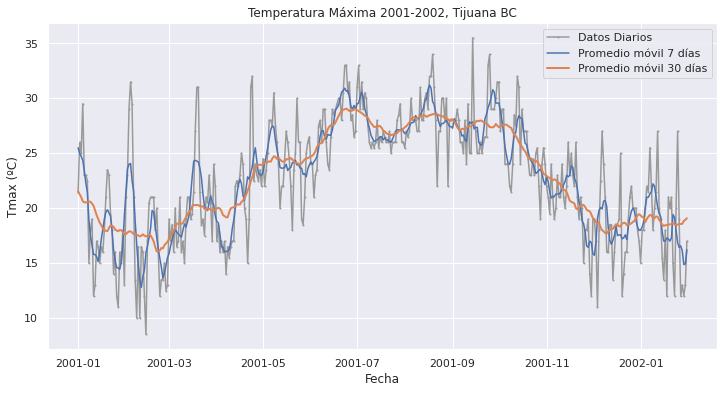

In [ ]:
# Tmax

# Fechas de inicio y fin, para filtrar la información
start, end = '2001-01', '2002-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
#ax.plot(df_90_365d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2001-2002, Tijuana BC')
ax.legend();

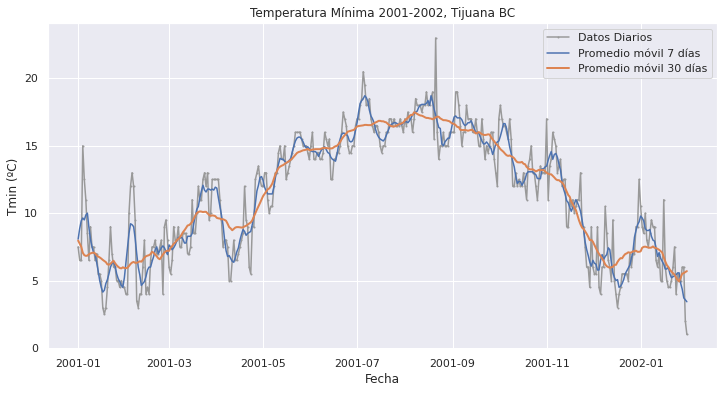

In [ ]:
# Tmin

# Fechas de inicio y fin, para filtrar la información
start, end = '2001-01', '2002-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmin'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2001-2002, Tijuana BC')
ax.legend();

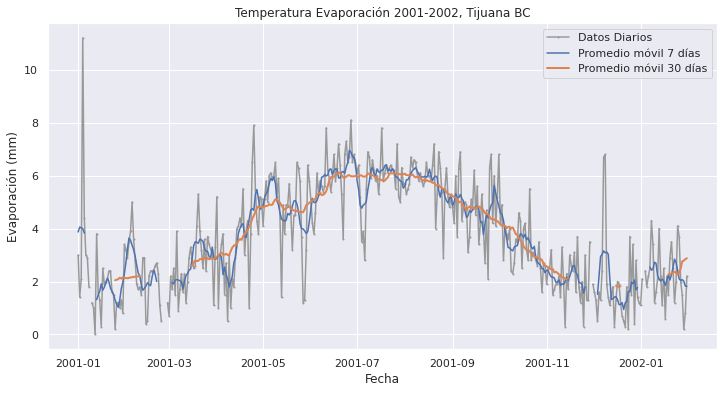

In [ ]:
# Evap

# Fechas de inicio y fin, para filtrar la información
start, end = '2001-01', '2002-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Evap'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_7d.loc[start:end, 'Evap'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Evap'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Temperatura Evaporación 2001-2002, Tijuana BC')
ax.legend();

$\text{Explora para 10 o más años de datos, contrastando los datos diarios con las gráficas de promedio móvil de 365 días.}$

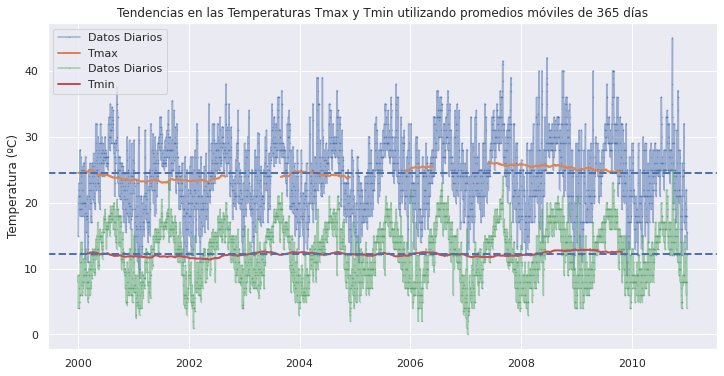

In [ ]:
# Graficas de promedios móviles de 365 días para las variables de las Temperaturas  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '2000-01', '2010-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_90_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color = 'b', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');

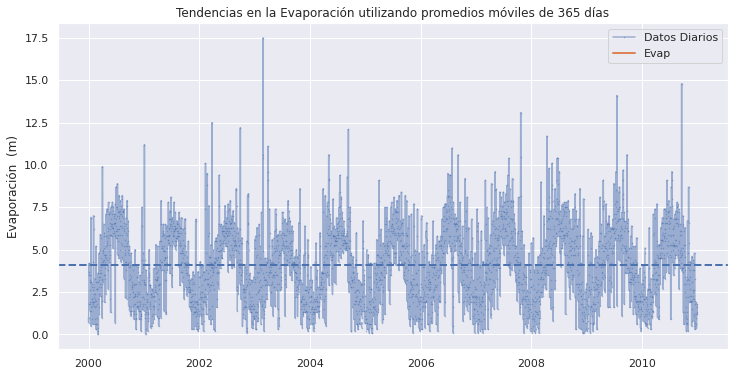

In [ ]:
# Graficas de promedios móviles de 365 días para las variables de las Temperaturas  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '2000-01', '2010-12'

fig, ax = plt.subplots()
for nm in ['Evap']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_90_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color = 'b', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Evaporación  (m)')
    ax.set_title('Tendencias en la Evaporación utilizando promedios móviles de 365 días');

## $\text{Ejercicio 5}$

$\text{Utiliza la biblioteca statsmodels.tsa de Python, para realizar una descomposición de una serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo.}$ \\
$\text{Aplica la función seasonal_decompose para lograr esto, a los datos de Temperaturas Tmax y Tmin, y si tienes datos de Evaporación, selecciona un periodo que haya datos. La función de seasonal_decompose aplica su propio promedio}$
$\text{móvil a las series de datos para su análisis.}$

$\text{Análisis de Tendencia de Tmax}$

In [ ]:
#  biblioteca 'statsmodel', también agregada en la celda 1
import statsmodels.api as sm 

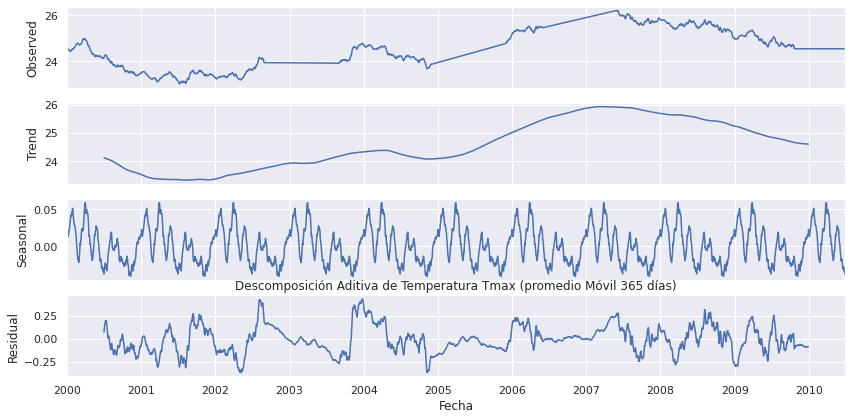

In [ ]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2010-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');

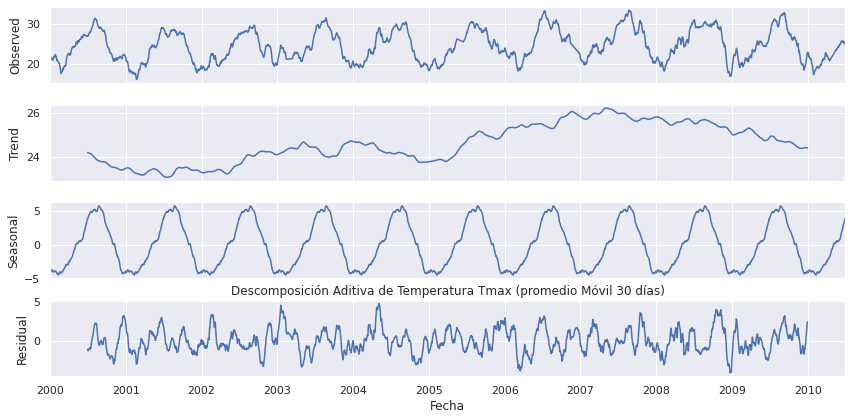

In [ ]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2010-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 30 días)');

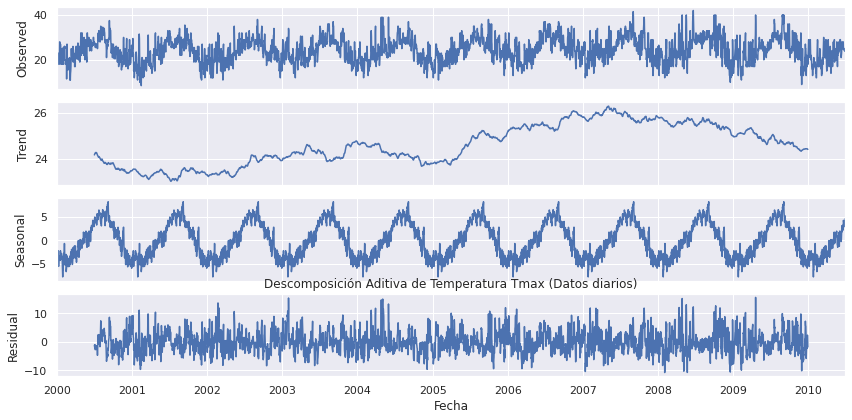

In [ ]:
# Caso: Uso de datos diarios 
# Descomposición de Series de Tiempo 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2010-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (Datos diarios)');

$\text{Análisis de Tendencia de Tmin}$

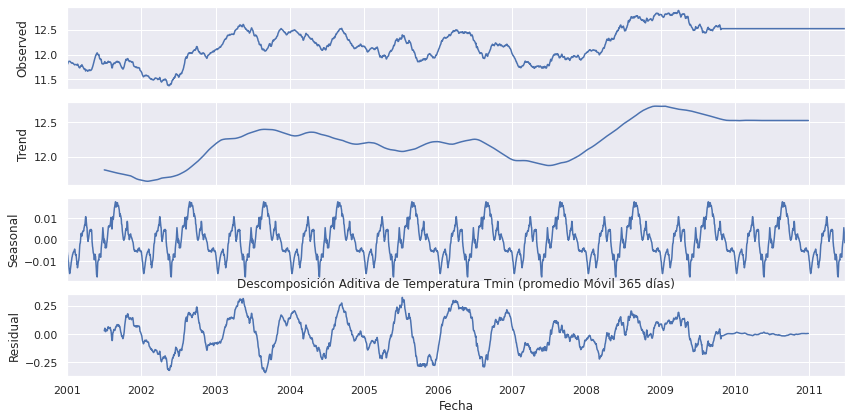

In [ ]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2001-01', '2011-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');

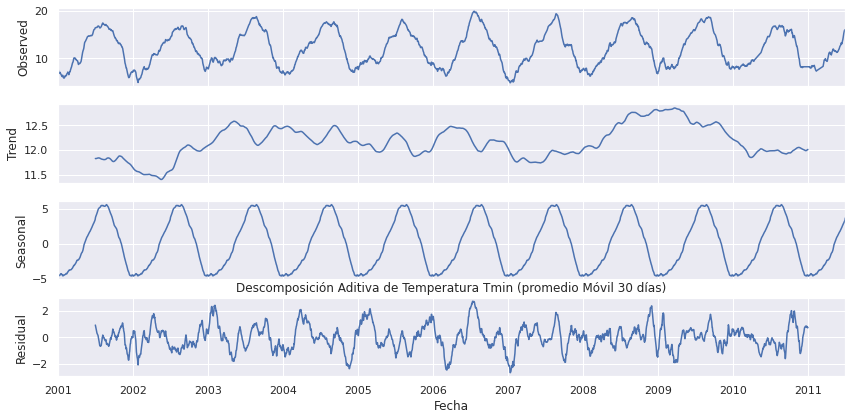

In [ ]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2001-01', '2011-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 30 días)');

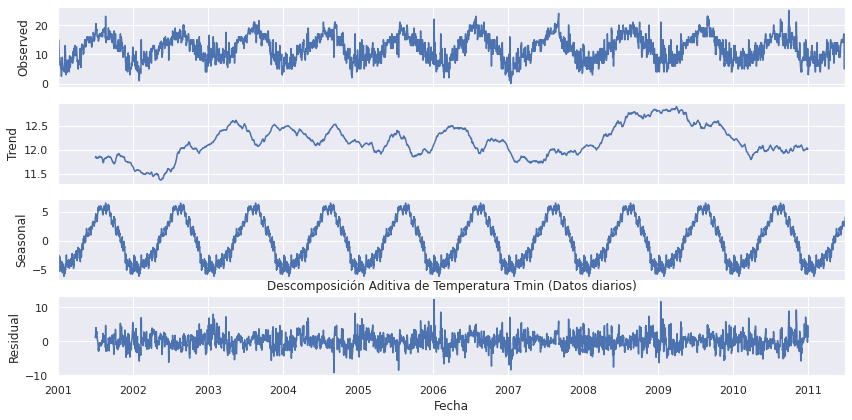

In [ ]:
# Caso: Uso de datos diarios.
# Descomposición de Series de Tiempo 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2001-01', '2011-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (Datos diarios)');

$\text{Análisis de Tendencia de Evaporación}$

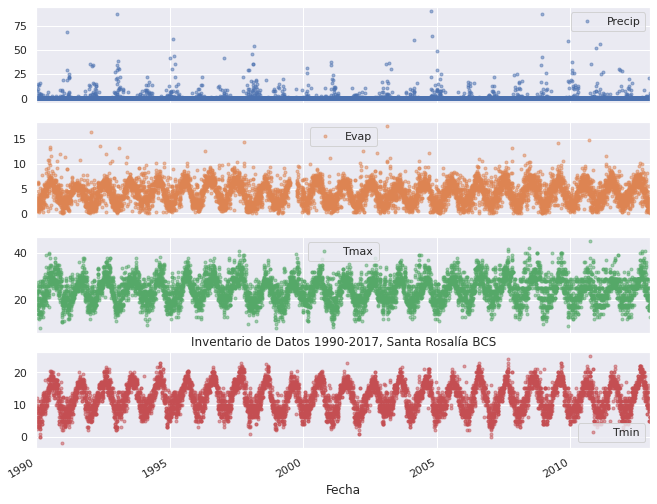

In [ ]:
# Podemos visualizar la colección de los últimos 30 años y ver si hay datos faltantes.
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1990-2017, Santa Rosalía BCS');

$\text{No hubo datos suficientes para el promdeio móvil de 365 días de la evaporación.}$

In [ ]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2010-01', '2012-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Evap'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Evaporación (promedio Móvil 365 días)');

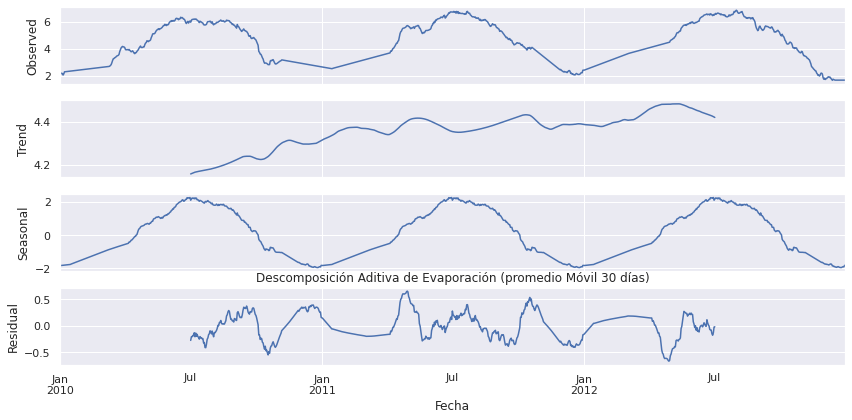

In [ ]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2010-01', '2012-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Evap'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Evaporación (promedio Móvil 30 días)');

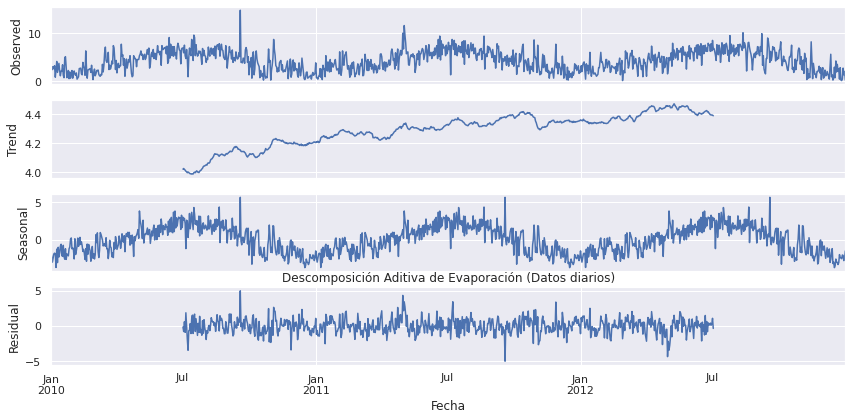

In [ ]:
# Caso: Uso de datos diarios.
# Descomposición de Series de Tiempo 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2010-01', '2012-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Evap'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Evaporación (Datos diarios)');

## $\text{Ejercicio 6}$

$\text{Por favor explora visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot.}$
$\text{Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos.}$

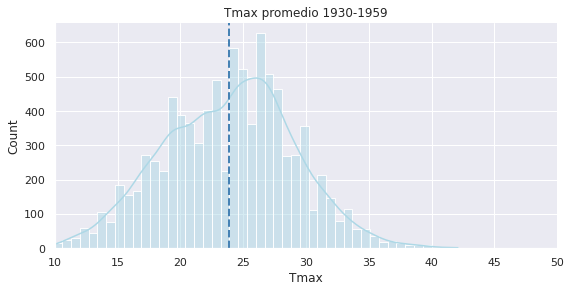

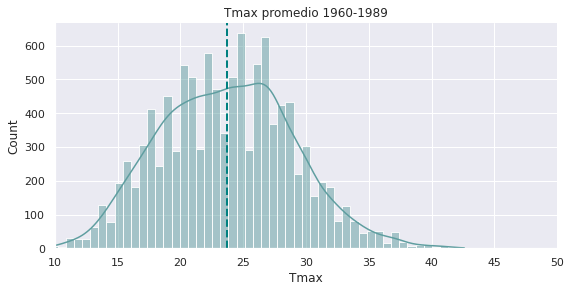

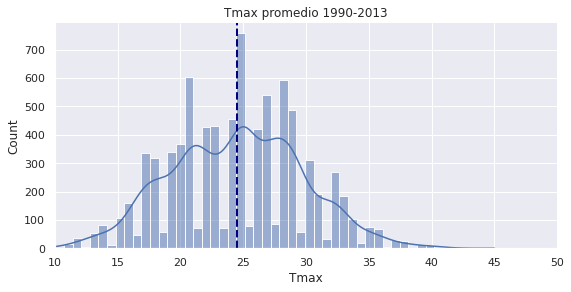

Tmax_promedio df_30 =  23.87520860781684 ºC
Tmax_promedio df_60 =  23.724407930971196 ºC
Tmax_promedio df_90 =  24.49429903191108 ºC
Tmin_sdev df_30 =  5.206837474362443 ºC
Tmin_sdev df_60 =  5.269870049087156 ºC
Tmin_sdev df_90 =  5.294292097599453 ºC


In [ ]:
# Gráfica de distribuciones de Temperaturas Tmax 

g1 = sns.displot(df_30.Tmax, kde=True, color='lightblue', height=4, aspect=2);
plt.axvline(df_30.Tmax.mean(), linestyle='--', linewidth=2, color='steelblue');

g2 = sns.displot(df_60.Tmax, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmax.mean(), linestyle='--', linewidth=2, color='teal');

g3 = sns.displot(df_90.Tmax, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmax.mean(), linestyle='--', linewidth=2, color='navy');

g1.set(title='Tmax promedio 1930-1959');
g2.set(title='Tmax promedio 1960-1989');
g3.set(title='Tmax promedio 1990-2013');
g1.set(xlim=(10,50))
g2.set(xlim=(10,50))
g3.set(xlim=(10,50))


plt.show();

print('Tmax_promedio df_30 = ', df_30.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_60 = ', df_60.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_90 = ', df_90.Tmax.mean(), 'ºC' )

print('Tmin_sdev df_30 = ', df_30.Tmax.std(), 'ºC' )
print('Tmin_sdev df_60 = ', df_60.Tmax.std(), 'ºC' )
print('Tmin_sdev df_90 = ', df_90.Tmax.std(), 'ºC' )

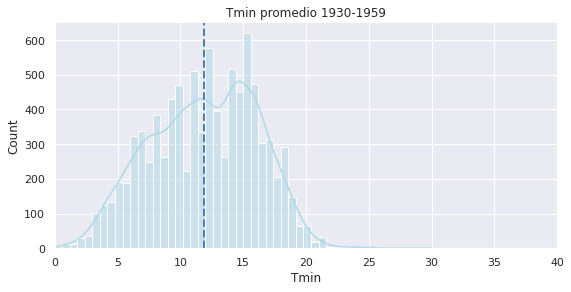

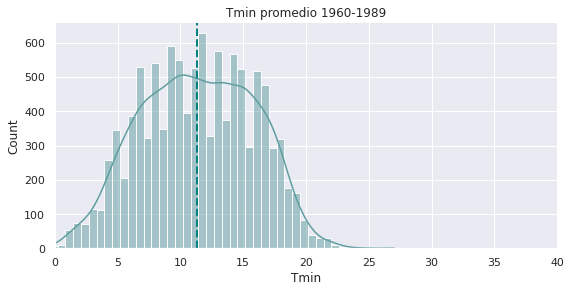

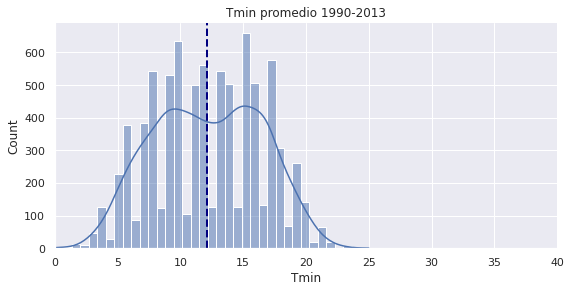

Tmin_promedio df_30 =  11.874353070175292 ºC
Tmin_promedio df_60 =  11.355491329479793 ºC
Tmin_promedio df_90 =  12.158677488660777 ºC
Tmin_sdev df_30 =  4.2372634952507084 ºC
Tmin_sdev df_60 =  4.49108636616897 ºC
Tmin_sdev df_90 =  4.30190879269457 ºC


In [ ]:
# Gráfica de distribuciones de Temperaturas Tmin 

g1 = sns.displot(df_30.Tmin, kde=True, color='lightblue', height=4, aspect=2);
plt.axvline(df_30.Tmin.mean(), linestyle='--', linewidth=2, color='steelblue');

g2 = sns.displot(df_60.Tmin, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmin.mean(), linestyle='--', linewidth=2, color='teal');

g3 = sns.displot(df_90.Tmin, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmin.mean(), linestyle='--', linewidth=2, color='navy');

g1.set(title='Tmin promedio 1930-1959');
g2.set(title='Tmin promedio 1960-1989');
g3.set(title='Tmin promedio 1990-2013');
g1.set(xlim=(0,40))
g2.set(xlim=(0,40))
g3.set(xlim=(0,40))


plt.show();

print('Tmin_promedio df_30 = ', df_30.Tmin.mean(), 'ºC' )
print('Tmin_promedio df_60 = ', df_60.Tmin.mean(), 'ºC' )
print('Tmin_promedio df_90 = ', df_90.Tmin.mean(), 'ºC' )

print('Tmin_sdev df_30 = ', df_30.Tmin.std(), 'ºC' )
print('Tmin_sdev df_60 = ', df_60.Tmin.std(), 'ºC' )
print('Tmin_sdev df_90 = ', df_90.Tmin.std(), 'ºC' )